<a href="https://colab.research.google.com/github/econb/data-science-mae/blob/main/3_Tarea_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#!pip install pandasql
import pandasql as ps
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
Municipios = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/3. Tarea Pandas/Municipios.xlsx",dtype={'Dep': str, 'Depmun': str, 'Irural': float, 'Poblacion': float})
Municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departamento  1118 non-null   object 
 1   Dep           1118 non-null   object 
 2   Municipio     1118 non-null   object 
 3   Depmun        1118 non-null   object 
 4   Superficie    1117 non-null   float64
 5   Poblacion     1118 non-null   float64
 6   Irural        1118 non-null   float64
 7   Region        1118 non-null   object 
dtypes: float64(3), object(5)
memory usage: 70.0+ KB


# Ejemplo 1
Cuales variables del conjunto de datos Municipios tienen valores perdidos o missings?

In [3]:
def missings(x):
            a = x.isna().sum()
            b = 100*x.isna().mean()
            c = pd.Series({"Missings": a,"%Missings": b})
            return(c)
Municipios.apply(missings)

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region
Missings,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
%Missings,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00


# Ejemplo 2
Se hace "limpieza" en los nombres de los municipios, es decir,

Se eliminan caracteres especiales
Se eliminan espacios al inicio y al final
Se reemplazan espacios múltiples por sencillos
Se escriben en letras minúsculas excepto en la inicial de cada palabra

In [ ]:
Municipios["Municipio2"] = (Municipios["Municipio"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ]","")
                            .str.replace(" +"," ")
                            .str.strip()
                            .str.title()
                           ) 
print(Municipios[["Municipio","Municipio2"]])
Municipios["Municipio"] = Municipios["Municipio2"]
Municipios = Municipios.drop(columns="Municipio2")

# Ejemplo 3
Se hace "limpieza" en los nombres de los departamentos, es decir,

Se eliminan caracteres especiales
Se eliminan espacios al inicio y al final
Se reemplazan espacios múltiples por sencillos
Se escriben en letras minúsculas excepto en la inicial de cada palabra

In [ ]:
Municipios["Departamento2"] = (Municipios["Departamento"]
                               .str.lower()
                               .str.replace("[^a-záéíóúüñ ]","")
                               .str.replace(" +"," ")
                               .str.strip()
                               .str.title()
                              ) 
print(Municipios[["Departamento","Departamento2"]])

Municipios["Departamento"] = Municipios["Departamento2"]
Municipios = Municipios.drop(columns="Departamento2")

#Ejemplo 4
Se crea la variable Tipo igual a "Capital" para la capital de cada departamento y "Otro" para el resto de los municipios.

In [ ]:
def tipo(x): 
    if x[2:5]=="001" and x!="25001": return("Capital")
    else: return("Otros")
Municipios["Tipo"] = Municipios["Depmun"].apply(tipo)

Municipios.query("Tipo=='Capital'")

#Ejemplo 5
Se crea la variable denspobl definida como el cociente entre Poblacion y Superficie. Se crea también la variable Zona igual a "Urbano" cuando Irural  <=40  y "Rural" cuando Irural  >40 .

In [ ]:
Municipios["denspobl"] = Municipios["Poblacion"]/Municipios["Superficie"]

def zona(x): 
    if x  > 40: return("Rural")
    if x <= 40: return("Urbano")
Municipios["Zona"] = Municipios["Irural"].apply(zona)

Municipios.head()

#Ejemplo 6
Cálculo de algunas estadísticas descriptivas para las variables numéricas en el conjunto de datos Municipios.

In [8]:
Municipios.describe()

,Superficie,Poblacion,Irural,denspobl
count,"1,117.00","1,118.00","1,118.00","1,117.00"
mean,"1,020.43","44,095.63",46.78,165.34
std,"3,217.70","260,344.32",12.70,733.12
min,15.84,288.00,0.00,0.07
25%,132.76,"6,614.00",40.00,21.43
50%,287.04,"12,796.50",46.00,44.89
75%,704.10,"27,501.75",52.00,93.37
max,"65,597.21","7,592,871.00",100.00,"14,442.77"


#Ejemplo 7
Cálculo de algunas estadísticas descriptivas (personalizadas) para las variables numéricas en el conjunto de datos Municipios.

In [10]:
def summary(y):
    def numer(x):
        a = x.mean()
        b = x.std()
        c = x.median()
        d = x.skew()
        e = x.kurt()
        f = pd.Series({"Mean":a,"St.dev":b,"Median":c,"Skewness":d,"Kurtosis":e})
        return(f)
    numerics = y._get_numeric_data()
    if len(numerics.columns) > 0: return(numerics.apply(numer))

summary(Municipios)


,Superficie,Poblacion,Irural,denspobl
Mean,"1,020.43","44,095.63",46.78,165.34
St.dev,"3,217.70","260,344.32",12.70,733.12
Median,287.04,"12,796.50",46.00,44.89
Skewness,10.85,23.38,0.70,12.33
Kurtosis,174.83,645.49,3.34,190.09


<H1 style="color:red;"><center>Tabla de frecuencias</center></H1>

# Ejemplo 1
Qué porcentaje del total representan los municipios del departamento de Norte de Santander? Cuantos municipios tiene el departamento del Valle del Cauca? Cuales son los cinco departamentos con mayor número de municipios? Qué porcentaje del total representan los municipios de estos cinco departamentos? Qué porcentaje de los municipios son rurales?

In [16]:
import pandas as pd

def onewayfreq(rows,data,weight=None,cum=True,ord="level",subset=None):
    if weight is None: weight = 1
    else: weight = data[weight] 
    if subset != None: data = data.query(subset,engine="python")    
    out = (pd.crosstab(index=data[rows],values=weight,aggfunc="sum",columns="sum").reset_index()
           .rename(columns={"sum":"Frequency"})
           .eval("Percent=100*Frequency/Frequency.sum()",engine="python")
          )
    if ord == "freq": out = out.sort_values(by=["Frequency"],ascending=False).reset_index(drop=True)    
    if ord == "-freq": out = out.sort_values(by=["Frequency"],ascending=True).reset_index(drop=True)    
    if cum == True: out = (out.eval("CumulativeFrequency=Frequency.cumsum()",engine="python")
                              .eval("CumulativePercent=Percent.cumsum()",engine="python"))
    out.columns.name=""    
    return(out)

def twowayfreq(rows,columns,data,weight=None,subset=None,ord="level",percent=False,rowpercent=False,colpercent=False):
    if weight is None: weight = 1
    else: weight = data[weight] 
    if subset != None: data = data.query(subset,engine="python")    
    out = pd.crosstab(index=data[rows],values=weight,aggfunc="sum",columns=data[columns],margins=True,margins_name="Total").reset_index().fillna(0)
    p1 = out.head(n=(len(out.index)-1))
    if ord == "freq": p1 = p1.sort_values(by=["Total"],ascending=False)
    if ord == "-freq": p1 = p1.sort_values(by=["Total"],ascending=True)    
    out = p1.append(out.tail(n=1)).reset_index(drop=True)
    ids = out.select_dtypes("number").columns
    out2 = out.copy().assign(Ind = "2")
    out3 = out.copy().assign(Ind = "3")
    out4 = out.copy().assign(Ind = "4")
    out = out.assign(Ind = "1")
    def pct(x):
        return(200*x/x.sum())
    out2[ids] = 200*out2[ids]/out2["Total"].sum()
    out3[ids] = out._get_numeric_data().apply(pct,axis=1)
    out4[ids] = out._get_numeric_data().apply(pct,axis=0)
    out = out.append(out2).append(out3).append(out4).rename_axis('MyIdx').sort_values(by=["MyIdx","Ind"])
    out.loc[out["Ind"] != "1",rows] = ""    
    print("Frequency")
    if percent == False: out = out.query("Ind != '2'")
    else: print("Percent")
    if rowpercent == False: out = out.query("Ind != '3'")    
    else: print("Row percent")        
    if colpercent == False: out = out.query("Ind != '4'")    
    else: print("Col percent")        
    out = out.drop(columns="Ind").reset_index(drop=True)
    out.columns.name=""
    out.index.names=[""]
    out = out.rename(columns={rows: rows + "  /  " + columns})
    print(" ")
    return(out)

print(onewayfreq(rows="Departamento",data=Municipios,ord="freq").head())
print(onewayfreq(rows="Zona",data=Municipios,cum=False))

   Departamento  Frequency  Percent  CumulativeFrequency  CumulativePercent
0     Antioquia        125    11.18                  125              11.18
1        Boyacá        123    11.00                  248              22.18
2  Cundinamarca        116    10.38                  364              32.56
3     Santander         87     7.78                  451              40.34
4        Nariño         64     5.72                  515              46.06
     Zona  Frequency  Percent
0   Rural        822    73.52
1  Urbano        296    26.48


#Ejemplo 2
Qué porcentaje de la población habita en el departamento del Meta? Cuantos habitantes tiene el departamento del Putumayo? Cuales son los cuatro departamentos con mayor número de habitantes? Qué porcentaje de la población habita en estos cuatro departamentos? Qué porcentaje de la población habita en municipios rurales?

In [ ]:
print(onewayfreq(rows="Departamento",weight="Poblacion",data=Municipios,ord="freq").head())
print(onewayfreq(rows="Zona",weight="Poblacion",data=Municipios,cum=False) ) 

#Ejemplo 3
Cuales son los cinco municipios más/menos poblados del departamento de Bolívar? Qué porcentaje representan estos municipios del total de la población en el departamento? Qué porcentaje de la población del departamento habita en municipios rurales?

In [ ]:
print(onewayfreq(rows="Municipio",weight="Poblacion",data=Municipios,subset="Dep=='13'",ord="freq")
.head())
print(onewayfreq(rows="Zona",weight="Poblacion",data=Municipios,subset="Dep=='13'",cum=False)
)

#Ejemplo 4
Qué porcentaje de la superficie total de Colombia representa el departamento del Chocó? Cual es la superficie del departamento de Córdoba? Cuales son los cinco departamentos con mayor/menor superficie? Qué porcentaje representan estos cinco departamentos de la superficie total de Colombia?

In [ ]:
print(onewayfreq(rows="Departamento",weight="Superficie",data=Municipios,ord="freq").head())  
print(onewayfreq(rows="Departamento",weight="Superficie",data=Municipios,ord="-freq").head())


#Ejemplo 5
Qué porcentaje de los municipios del departamento de La Guajira son rurales? Qué porcentaje de los municipios rurales están en el departamento de Vaupés?

In [ ]:
twowayfreq(rows="Departamento",columns="Zona",data=Municipios,ord="freq",rowpercent=True,colpercent=True)


#Ejemplo 6
Qué porcentaje de la población del departamento de Boyacá está en municipios rurales? Qué porcentaje de la población total en municipios rurales está en el departamento de Antioquia?

In [ ]:
twowayfreq(rows="Departamento",columns="Zona",weight="Poblacion",data=Municipios,ord="freq").head()


#Ejemplo 7
Qué porcentaje de la superficie del departamento de Nariño corresponde a municipios rurales? Qué porcentaje de la superficie total en municipios rurales está en el departamento de Atlántico?

In [ ]:
twowayfreq(rows="Departamento",columns="Zona",weight="Superficie",data=Municipios,ord="freq")

<h1><center>Consulta, transformación y creación de conjuntos de datos</center></h1>
<h2><center>Libreria pandasql</center></h2>

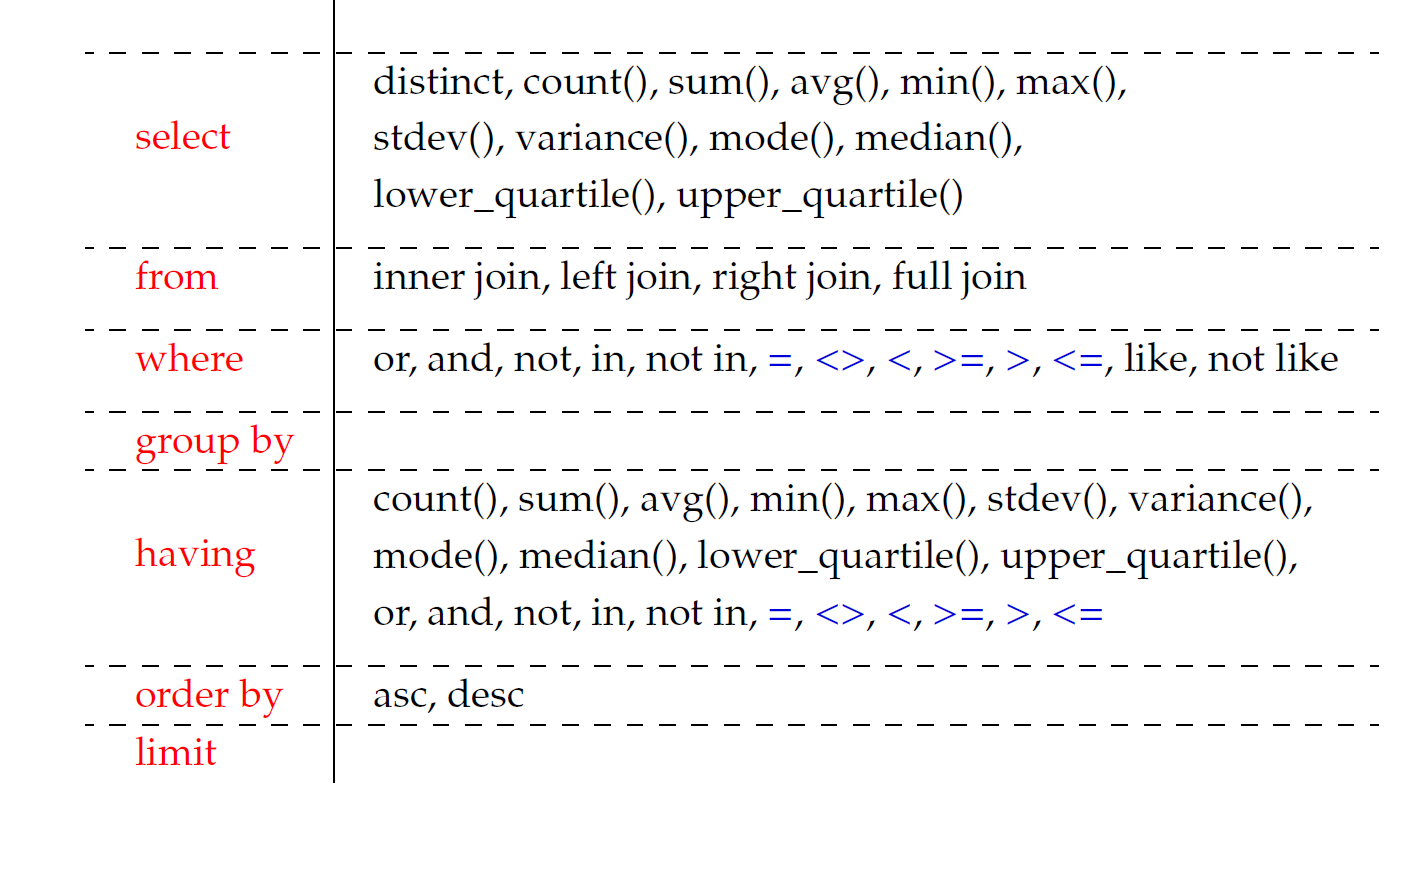


#Ejemplo 1
data.frame con las variables Departamento, Dep, Depmun, Municipio, Superficie y Poblacion que incluye todos los municipios de los departamentos de Antioquia y Caldas con más de 20 mil habitantes y donde los mismos están ordenados con respecto a Dep y de mayor a menor con respecto a Poblacion.

In [49]:
E1 = ps.sqldf("""select   Departamento, Dep, Depmun, Municipio, Superficie, Poblacion
                 from     Municipios
                 where    Dep in ('05','17') and Poblacion > 20000
                 order by Dep asc, Poblacion desc""")
e1 = (Municipios
      .loc[:,["Departamento", "Dep", "Depmun", "Municipio", "Superficie", "Poblacion"]] 
      .query("Poblacion > 20000 and Dep in ('05','17')")
      .sort_values(by=["Dep","Poblacion"],ascending=[True,False])
      .reset_index(drop=True)
     )

E1.head(3)

,Departamento,Dep,Depmun,Municipio,Superficie,Poblacion
0,Antioquia,05,05001,Medellín,374.83,"2,483,545.00"
1,Antioquia,05,05088,Bello,147.76,"538,527.00"
2,Antioquia,05,05360,Itagui,19.65,"283,794.00"


#Ejemplo 2
data.frame con las variables Departamento, Dep, Depmun, Municipio, Superficie y Poblacion que incluye todos los municipios con superficies menores a 300  km2  excepto los de Boyacá y Santander, y que están ordenados por Dep y de mayor a menor por Poblacion. Incluye una variable definida como "Baja" para los municipios con denspobl menor o igual a 30, "Alta" para los municipios con denspobl mayor a 85, y "Media" para los demás.

In [50]:
E2 = ps.sqldf("""select   Departamento, Dep, Depmun, Municipio, Superficie,
                          Poblacion, case when denspobl <= 30 then 'Baja'
                                          when denspobl > 85 then 'Alta'
                                          else 'Media'
                                     end as denspoblC
                 from     Municipios
                 where    Dep not in ('15','68') and Superficie < 300
                 order by Dep asc, Poblacion desc""")

e2 = Municipios
limites = [np.NINF,30,85,np.inf]
e2["denspoblC"] = pd.cut(e2["denspobl"],limites,labels=["Baja","Media","Alta"]).astype("object")
e2 = (e2
      .loc[:,["Departamento", "Dep", "Depmun", "Municipio", "Superficie", "Poblacion", "denspoblC"]] 
      .query("Dep not in ('15','68') and Superficie < 300")
      .sort_values(by=["Dep","Poblacion"],ascending=[True,False])
      .reset_index(drop=True)
     )

E2.head(3)

,Departamento,Dep,Depmun,Municipio,Superficie,Poblacion,denspoblC
0,Antioquia,05,05088,Bello,147.76,"538,527.00",Alta
1,Antioquia,05,05360,Itagui,19.65,"283,794.00",Alta
2,Antioquia,05,05266,Envigado,78.00,"236,114.00",Alta


#Ejemplo 3
Existen dos o más municipios con el mismo Depmun?

In [51]:
ps.sqldf("""select   Depmun, count(*) as count
            from     Municipios
            group by Depmun 
            having   count > 1""")
(Municipios
 .groupby("Depmun")["Depmun"]
 .agg(["count"]).reset_index()
 .query("count > 1")
)

,Depmun,count


#Ejemplo 4
De los departamentos con dos o más municipios cual es el menos homogeneo (de acuerdo al rango) con respecto a la superficie de los municipios que lo componen?

In [52]:
ps.sqldf("""select   Dep, Departamento, (max(Superficie)-min(Superficie)) as rango
            from     Municipios 
            group by Dep, Departamento
            having   count(*) > 1 
            order by rango desc 
            limit    1""")
def rango(x): 
    return(x.max()- x.min())

(Municipios
 .groupby(["Dep","Departamento"])["Superficie"]
 .agg(["count",rango]).reset_index()
 .query("count > 1").drop(columns="count") 
 .sort_values(by=["rango"],ascending=False).reset_index(drop=True)
 .head(n=1)
)

,Dep,Departamento,rango
0,99,Vichada,"61,905.34"


#Ejemplo 5
De los departamentos con dos o más municipios cual es el más homogeneo (de acuerdo al coeficiente de variación) con respecto a la superficie de los municipios que lo componen?

In [54]:
ps.sqldf("""select   Dep, Departamento, (max(Superficie)-min(Superficie)) as rango
            from     Municipios 
            group by Dep, Departamento
            having   count(*) > 1 
            order by rango  
            limit    1""")
(Municipios.groupby(["Dep","Departamento"])["Superficie"]
  .agg(["count",rango]).reset_index()
  .query("count > 1").drop(columns="count") 
  .sort_values(by=["rango"],ascending=True).reset_index(drop=True)
  .head(n=1)
 )

,Dep,Departamento,rango
0,88,San Andrés,4.86


#Ejemplo 6
data.frame con todos los departamentos, ordenados de mayor a menor con respecto a su población, que incluye la siguiente información: número de municipios, superficie, población, índice de ruralidad promedio ponderado por población, densidad poblacional, y una variable igual a "Grande" para los departamentos con población mayor a  1.5  millones de habitantes, "Pequeño" para departamentos con población menor a  300  mil habitantes, y "Mediano" para el resto.

In [57]:
E6 = ps.sqldf("""select   Dep, Departamento, count(*) as nmunicipios, sum(Poblacion) as totpob,
                          sum(Superficie) as totsup, sum(Irural*Poblacion)/sum(Poblacion) as Irural, 
                          sum(Poblacion)/sum(Superficie) as denspob,
                          case when sum(Poblacion) > 1500000 then 'Grande'
                               when sum(Poblacion) <= 300000 then 'Pequeño'
                               else 'Mediano'
                          end as totpobC
                 from     Municipios
                 group by Dep, Departamento
                 order by totpob desc""")

Municipios["Irural2"] = Municipios["Irural"]*Municipios["Poblacion"]

e6 = (Municipios
      .groupby(["Dep","Departamento"])[["Depmun","Superficie","Poblacion","Irural2"]]
      .agg(nmunicipios=("Depmun","count"),totpob=("Poblacion","sum"),totsup=("Superficie","sum"),
           Irural=("Irural2","sum")).reset_index()
      .eval("Irural = Irural/totpob")      
      .eval("denspob = totpob/totsup")      
      .sort_values(by=["totpob"],ascending=False)
      .reset_index(drop=True)
     )

limites = [np.NINF,300000,1500000,np.inf]
e6["totpobC"] = pd.cut(e6["totpob"],limites,labels=["Pequeño","Mediano","Grande"]).astype("object")

Municipios = Municipios.drop(columns="Irural2")
e6.head(3)

,Dep,Departamento,nmunicipios,totpob,totsup,Irural,denspob,totpobC
0,11,Bogotá D C,1,"7,592,871.00","1,622.85",6.00,"4,678.72",Grande
1,05,Antioquia,125,"6,550,206.00","62,804.71",21.32,104.29,Grande
2,76,Valle Del Cauca,42,"4,506,768.00","20,665.54",22.58,218.08,Grande


#Ejemplo 7
Cual es la región con la mayor superficie?

In [58]:
ps.sqldf("""select   Region
            from     Municipios
            group by Region
            order by sum(Superficie) desc
            limit    1""")
(Municipios
 .groupby(["Region"])["Superficie"]
 .agg(["sum"]).reset_index()
 .sort_values(by=["sum"],ascending=False).drop(columns="sum").reset_index(drop=True)
 .head(n=1)
)

,Region
0,Región Llano


#Ejemplo 8
data.frame con todos los departamentos, ordenados de mayor a menor con respecto a su población, que incluye la siguiente información: número de municipios, superficie, población, densidad poblacional, todo referente a los municipios con índice de ruralidad mayor a 60.

In [59]:
E8 = ps.sqldf("""select   Dep, Departamento, count(*) as nmunicipios, sum(Poblacion) as totpob,
                          sum(Superficie) as totsup, sum(Poblacion)/sum(Superficie) as denspob
                 from     Municipios
                 where    Irural > 60
                 group by Dep, Departamento
                 order by totpob desc""")
e8 = (Municipios
      .query("Irural > 60")
      .groupby(["Dep","Departamento"])[["Depmun","Superficie","Poblacion"]]
      .agg(nmunicipios=("Depmun","count"),totpob=("Poblacion","sum"),totsup=("Superficie","sum")).reset_index()
      .sort_values(by=["totpob"],ascending=False)
      .reset_index(drop=True))

e8["denspob"] = e8["totpob"]/e8["totsup"]
e8.head(3)

,Dep,Departamento,nmunicipios,totpob,totsup,denspob
0,50,Meta,12,"207,857.00","74,457.93",2.79
1,27,Chocó,8,"153,096.00","26,448.17",5.79
2,85,Casanare,12,"146,548.00","37,493.09",3.91


#Ejemplo 9
Cual es la región con el mayor número de departamentos?

In [61]:
ps.sqldf("""select   Region
            from     Municipios
            group by Region
            order by count(distinct Dep) desc
            limit    1""")
(Municipios.groupby(["Region"])["Dep"]
          .agg(["nunique"]).reset_index()
          .sort_values(by=["nunique"],ascending=False).drop(columns="nunique")
          .head(n=1)
         )

,Region
0,Región Caribe


#Ejemplo 10
data.frame con todos los departamentos con al menos 650 mil habitantes y al menos 10 mil  km2  de superficie, ordenados de mayor a menor con relación a su densidad poblacional, y que incluye la siguiente información: número de municipios, superficie, población y densidad poblacional.

In [62]:
E10 = ps.sqldf("""select   Dep, Departamento, count(*) as nmunicipios, sum(Poblacion) as totpob, 
                           sum(Superficie) as totsup, sum(Poblacion)/sum(Superficie) as denspob
                  from     Municipios
                  group by Dep, Departamento
                  having   totpob >= 650000 and totsup >= 10000
                  order by denspob desc""")
e10=(Municipios
       .groupby(["Dep","Departamento"])[["Depmun","Superficie","Poblacion"]]
       .agg(nmunicipios=("Depmun","count"),totpob=("Poblacion","sum"),totsup=("Superficie","sum")).reset_index()
       .eval("denspob = totpob/totsup")
       .query("totpob >= 650000 and totsup >= 10000")
       .sort_values(by=["denspob"],ascending=False).reset_index(drop=True)
      )
e10.head(3)

,Dep,Departamento,nmunicipios,totpob,totsup,denspob
0,76,Valle Del Cauca,42,"4,506,768.00","20,665.54",218.08
1,25,Cundinamarca,116,"3,085,522.00","22,370.49",137.93
2,05,Antioquia,125,"6,550,206.00","62,804.71",104.29


#Ejemplo 11
data.frame con todos los departamentos con al menos 650 mil habitantes y al menos 10 mil  km2  de superficie, ordenados de mayor a menor con relación a su densidad poblacional, y que incluye la siguiente información: número de municipios, superficie, población, y densidad poblacional, todo referente a municipios con índice de ruralidad mayor a 40.

In [63]:
E11 = ps.sqldf("""select   Dep, Departamento, count(*) as nmunicipios, sum(Poblacion) as totpob, 
                           sum(Superficie) as totsup, sum(Poblacion)/sum(Superficie) as denspob
                  from     Municipios
                  where    Irural > 40
                  group by Dep, Departamento
                  having   totpob >= 650000 and totsup >= 10000
                  order by denspob desc""")
e11 = (Municipios
       .query("Irural > 40")
       .groupby(["Dep","Departamento"])[["Depmun","Superficie","Poblacion"]]
       .agg(nmunicipios=("Depmun","count"),totpob=("Poblacion","sum"),totsup=("Superficie","sum")).reset_index()
       .eval("denspob = totpob/totsup")
       .query("totpob >= 650000 and totsup >= 10000")
       .sort_values(by=["denspob"],ascending=False).reset_index(drop=True)
      ) 
e11.head(3)

,Dep,Departamento,nmunicipios,totpob,totsup,denspob
0,44,La Guajira,15,"927,506.00","20,621.96",44.98
1,23,Córdoba,18,"813,722.00","18,777.92",43.33
2,20,Cesar,23,"734,244.00","18,303.55",40.11


#Ejemplo 12
Existen dos o más municipios con el mismo nombre? Cuantos? Cuales? En qué departamentos están ubicados?

In [64]:
Repetidos = ps.sqldf("""select   Municipio, count(*) as veces
                        from     Municipios
                        group by Municipio
                        having   veces > 1
                        order by veces desc""")

E12 = ps.sqldf("""select   Municipio, Departamento, Dep, Depmun
                  from     Municipios
                  where    Municipio in (select Municipio 
                                         from   Repetidos)
                  order by Municipio, Departamento""")


Repetidos = (Municipios
             .groupby("Municipio")
             .agg(reps=("Municipio","count")).reset_index()
             .query("reps > 1")
             .sort_values(by=["reps"],ascending=False) 
            )
reps = Repetidos["Municipio"]

e12 = (Municipios
       .loc[:,["Municipio", "Departamento", "Dep", "Depmun"]] 
       .query("Municipio in @reps")
       .sort_values(by=["Municipio", "Departamento"],ascending=[True,True]).reset_index(drop=True)
      )

e12.head(3)

,Municipio,Departamento,Dep,Depmun
0,Albania,Caquetá,18,18029
1,Albania,La Guajira,44,44035
2,Albania,Santander,68,68020


#Ejemplo 13
Existen dos o más municipios con el mismo nombre que hacen parte de la misma región? Cuantos? Cuales?

In [65]:
Municipios["regmun"] = Municipios["Region"] + Municipios["Municipio"]

Repetidos = ps.sqldf("""select   regmun, count(*) as veces
                        from     Municipios
                        group by Region, Municipio
                        having   veces > 1
                        order by veces desc""")

E13 = ps.sqldf("""select   Municipio, Region, Departamento, Dep, Depmun
                  from     Municipios
                  where    regmun in (select regmun
                                      from   Repetidos)
                  order by Municipio asc, Region asc""")

Repetidos = (Municipios
             .groupby("regmun")
             .agg(reps=("regmun","count")).reset_index()
             .query("reps > 1")
             .sort_values(by=["reps"],ascending=False) 
            )
reps = Repetidos["regmun"]

e13 = (Municipios
       .query("regmun in @reps")
       .loc[:,["Municipio", "Region", "Departamento", "Dep", "Depmun"]] 
       .sort_values(by=["Municipio", "Region"],ascending=[True,True])
       .reset_index(drop=True)
      )
e13.head(3)

,Municipio,Region,Departamento,Dep,Depmun
0,Argelia,Región Pacífico,Cauca,19,19050
1,Argelia,Región Pacífico,Valle Del Cauca,76,76054
2,Armenia,Región Eje Cafetero,Antioquia,05,05059


#Ejemplo 14
data.frame con los municipios cuyos nombres inician con "A" o terminan con "o".

In [66]:
E14 = ps.sqldf("""select   Dep, Departamento, Municipio, Depmun
                  from     Municipios
                  where    Municipio like 'A%' or Municipio like '%o'
                  order by Depmun""")
e14 = (Municipios
       .query("Municipio.str.contains('^A|o$')",engine="python")
       .loc[:,["Dep", "Departamento", "Municipio", "Depmun"]] 
       .sort_values(by=["Depmun"],ascending=True)
       .reset_index(drop=True)
      )
e14.head(3)

,Dep,Departamento,Municipio,Depmun
0,05,Antioquia,Abejorral,05002
1,05,Antioquia,Abriaquí,05004
2,05,Antioquia,Alejandría,05021


#Ejemplo 16
data.frame con los municipios cuyo nombre tiene a la letra "e" en las posiciones 2 y 4.

In [67]:
E16 = ps.sqldf("""select   Dep, Departamento, Municipio, Depmun
                  from     Municipios
                  where    Municipio like '_e_e%'
                  order by Depmun""")
e16 = (Municipios
       .query("Municipio.str.contains('^.{1}e.{1}e.*')",engine="python")
       .loc[:,["Dep", "Departamento", "Municipio", "Depmun"]] 
       .sort_values(by=["Depmun"],ascending=True)
       .reset_index(drop=True)
      )
e16.head(3)

,Dep,Departamento,Municipio,Depmun
0,05,Antioquia,Medellín,05001
1,05,Antioquia,Remedios,05604
2,05,Antioquia,Venecia,05861


#Ejemplo 17
data.frame con los municipios cuyos nombres constan de más de una palabra.

In [69]:
E17 = ps.sqldf("""select   Dep, Departamento, Municipio, Depmun
                  from     Municipios
                  where    Municipio like '% %'
                  order by Depmun""")
e17 = (Municipios
       .query("Municipio.str.contains('.* .*')",engine="python")
       .loc[:,["Dep", "Departamento", "Municipio", "Depmun"]] 
       .sort_values(by=["Depmun"],ascending=True)
       .reset_index(drop=True)
      )
e17.head(3)

,Dep,Departamento,Municipio,Depmun
0,05,Antioquia,Santafé De Antioquia,05042
1,05,Antioquia,Ciudad Bolívar,05101
2,05,Antioquia,El Carmen De Viboral,05148


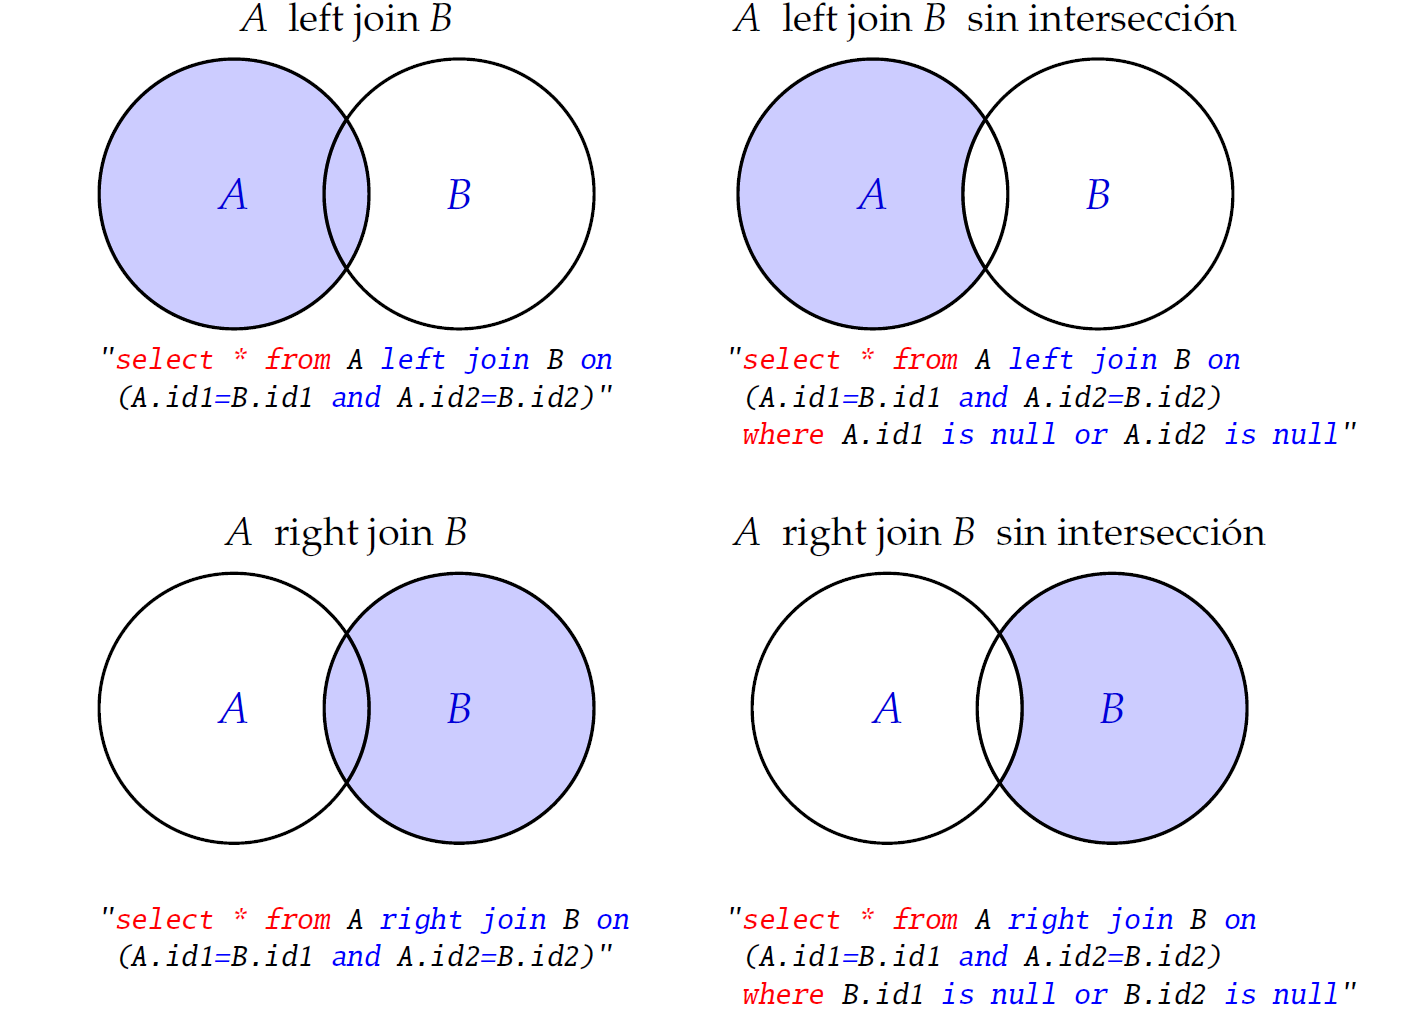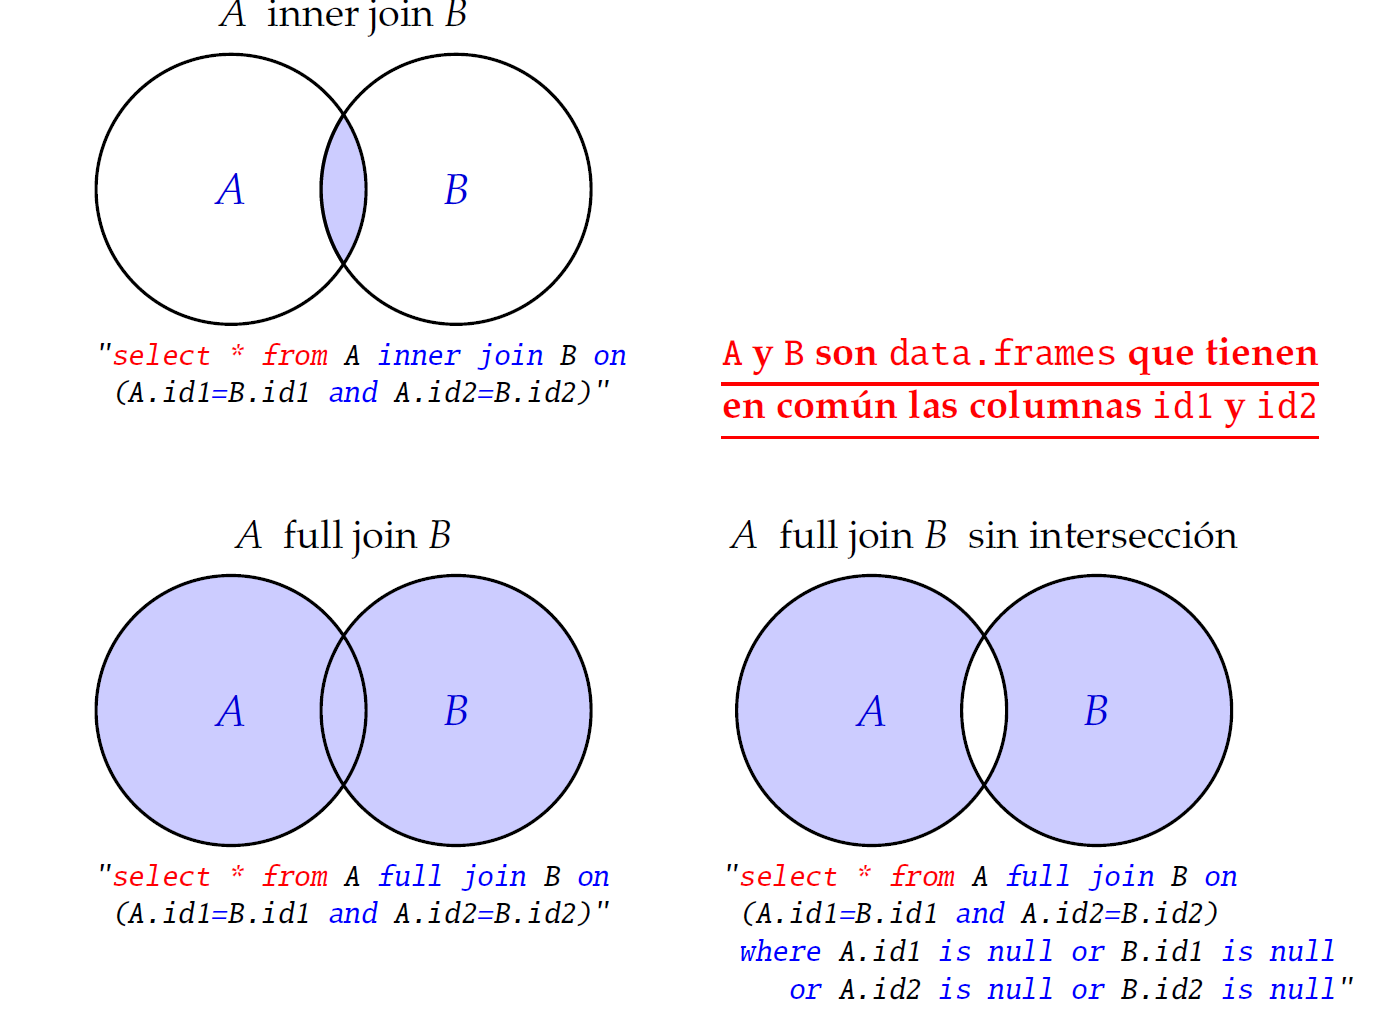

<h1><center>Seaborn</center></h1>

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
Advertising = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/3. Tarea Pandas/Advertising.xlsx")
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


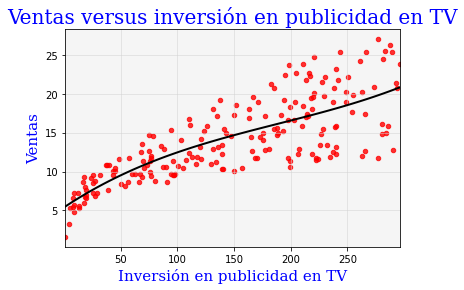

In [28]:
fig = sns.regplot(x="TV",y="sales",data=Advertising,order=3,marker="o",
                  scatter_kws={"s":20,"color":"red"},line_kws={"ls":"solid","lw":2,"color":"black"},ci=None)
plt.xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"blue","size":15})
plt.ylabel("Ventas",fontdict={"family":"serif","color":"blue","size":15})
plt.title("Ventas versus inversión en publicidad en TV",
          fontdict={"family":"serif","color":"blue","size":20},loc="center")
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
fig.patch.set_facecolor("whitesmoke")
plt.show(fig)

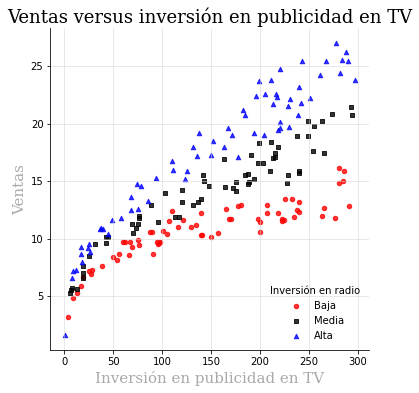

In [32]:
cats = 3
bins = Advertising["radio"].quantile(np.arange(0,cats+1)/cats) 
Advertising["radioC"] = pd.cut(Advertising["radio"],bins,labels=["Baja","Media","Alta"])

fig = sns.lmplot(x="TV",y="sales",data=Advertising,order=3,hue="radioC",markers=["o","s","^"],
                 palette=dict(Baja="red",Media="black",Alta="blue"),
                 scatter_kws={"s":20},ci=None,legend=False,fit_reg=False,
                 line_kws={"ls":"solid","lw":2})
plt.legend(loc='lower right',title="Inversión en radio",frameon=False,ncol=1)
plt.xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.title("Ventas versus inversión en publicidad en TV",
          fontdict={"family":"serif","color":"black","size":18},loc="center")
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)

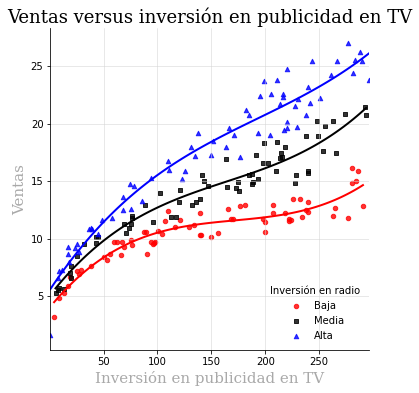

In [33]:
fig = sns.lmplot(x="TV",y="sales",data=Advertising,order=3,hue="radioC",markers=["o","s","^"],
                 palette=dict(Baja="red",Media="black",Alta="blue"),
                 scatter_kws={"s":20},ci=None,legend=False,
                 line_kws={"ls":"solid","lw":2})
plt.legend(loc='lower right',title="Inversión en radio",frameon=False,ncol=1)
plt.xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.title("Ventas versus inversión en publicidad en TV",
          fontdict={"family":"serif","color":"black","size":18},loc="center")
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)

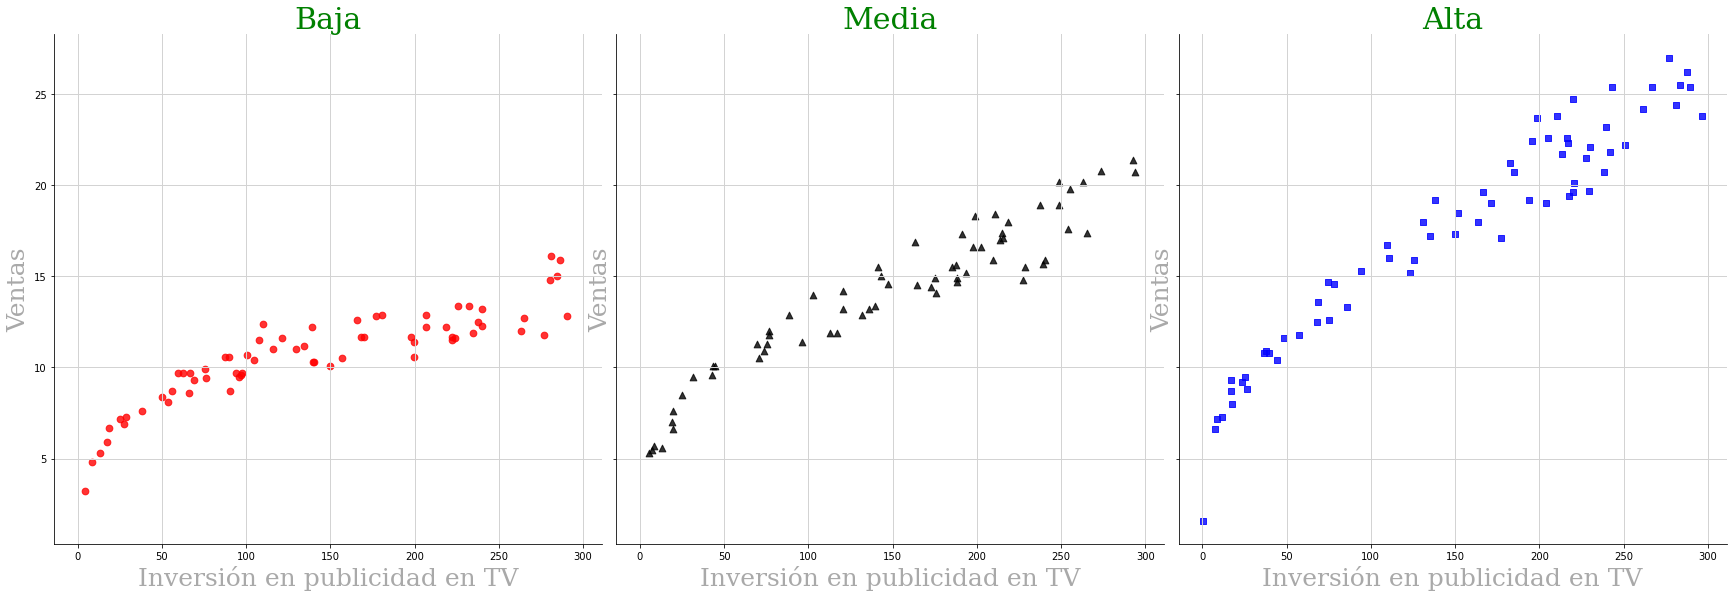

In [34]:
g = sns.FacetGrid(data=Advertising,col="radioC",hue="radioC",sharey=True,height=8,
                  hue_kws=dict(marker=["o","^","s"],color=["red","black","blue"]))
g.map(sns.regplot,"TV","sales",order=3,scatter_kws={"s":45},line_kws={"ls":"solid","lw":1},ci=None,fit_reg=False)
axes = g.axes.flatten()
titulos = ["Baja","Media","Alta"]
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

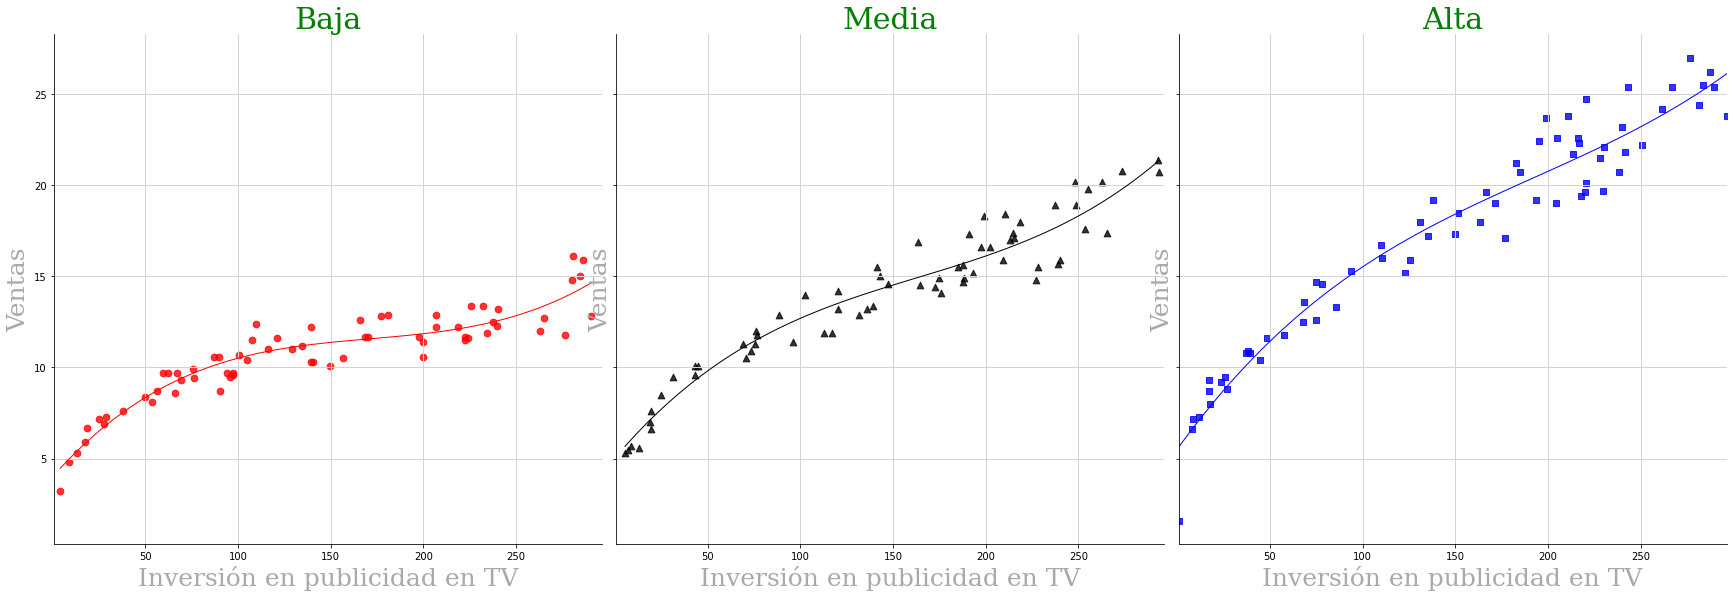

In [35]:
g = sns.FacetGrid(data=Advertising,col="radioC",hue="radioC",sharey=True,height=8,
                  hue_kws=dict(marker=["o","^","s"],color=["red","black","blue"]))
g.map(sns.regplot,"TV","sales",order=3,scatter_kws={"s":45},line_kws={"ls":"solid","lw":1},ci=None)
axes = g.axes.flatten()
titulos = ["Baja","Media","Alta"]
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

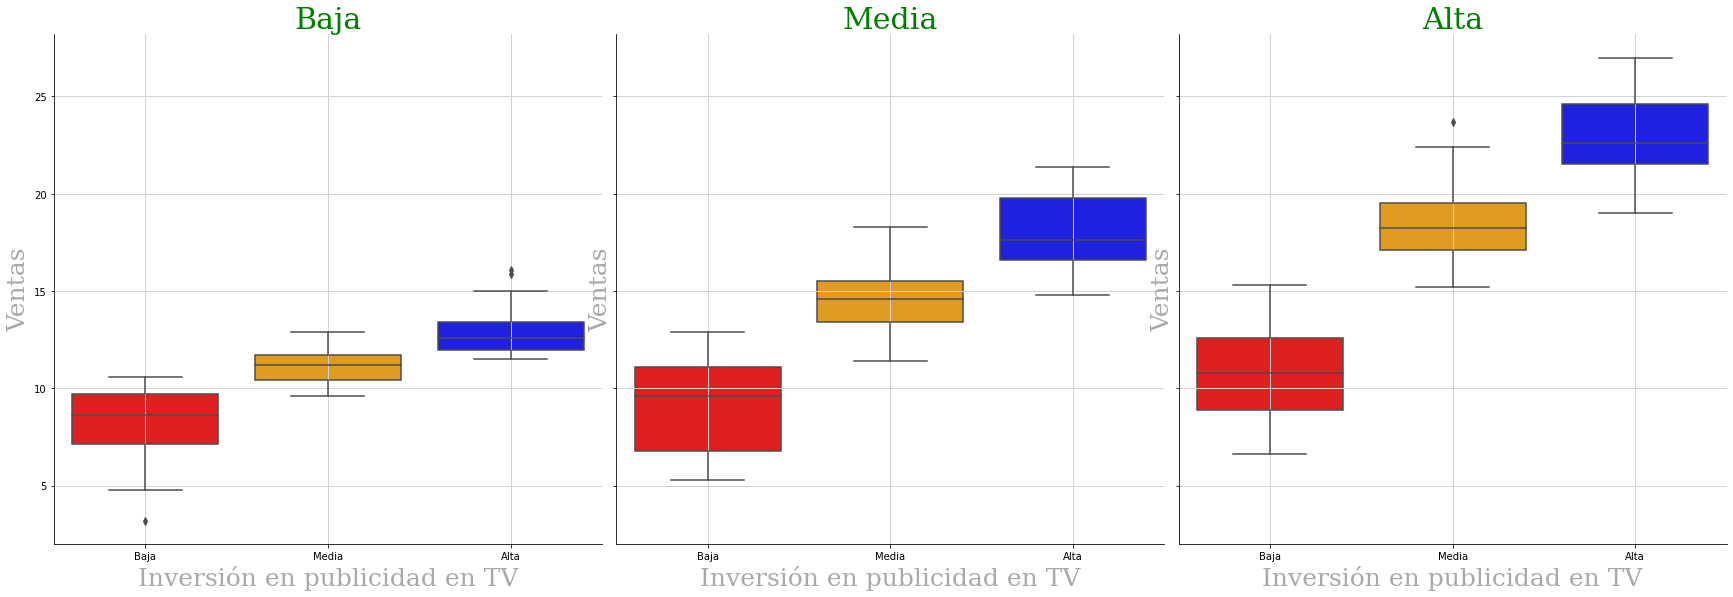

In [36]:
cats = 3
bins = Advertising["TV"].quantile(np.arange(0,cats+1)/cats) 
Advertising["TVC"] = pd.cut(Advertising["TV"],bins,labels=["Baja","Media","Alta"])

g = sns.FacetGrid(data=Advertising,col="radioC",sharey=True,height=8)
g.map(sns.boxplot,"TVC","sales",order=titulos,palette=dict(Baja="red",Media="orange",Alta="blue"),linewidth=1.5)
axes = g.axes.flatten()
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

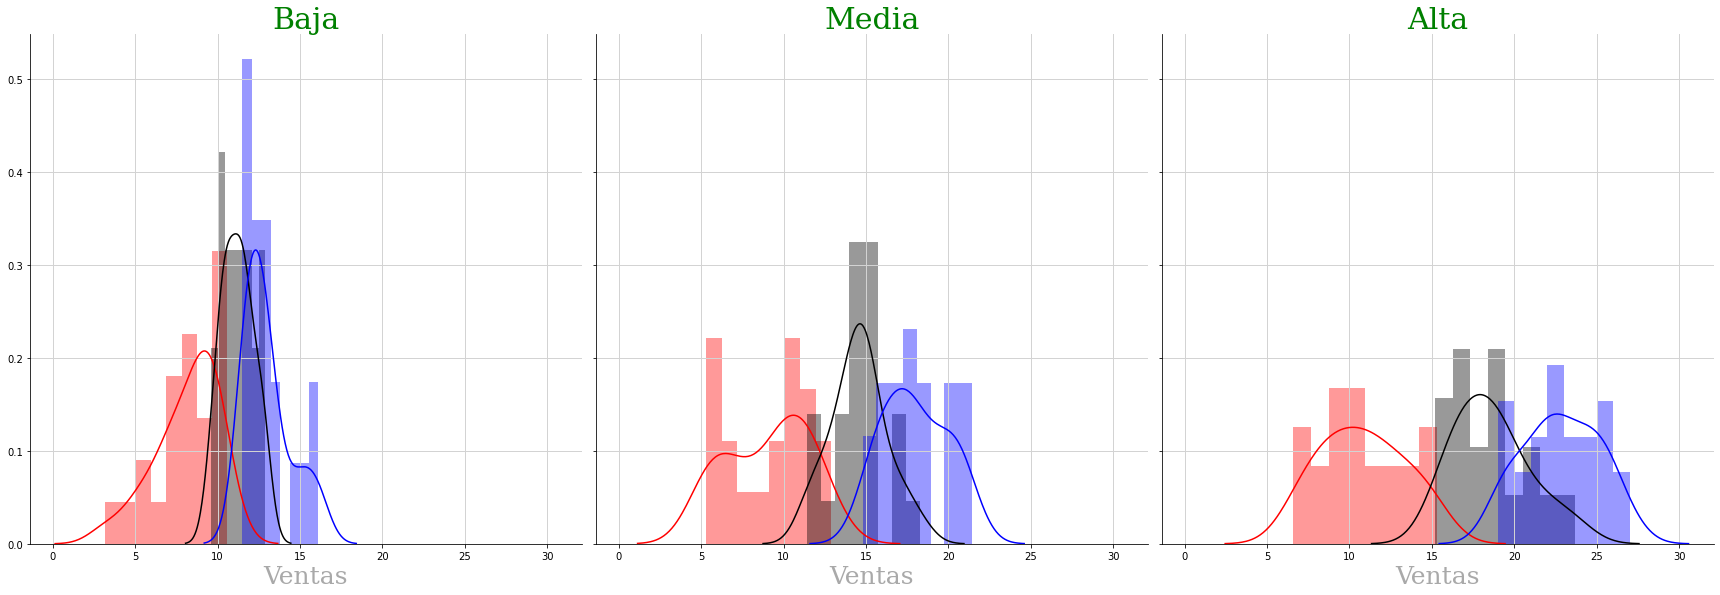

In [39]:
g = sns.FacetGrid(data=Advertising,col="radioC",hue="TVC",sharey=True,height=8,
                 hue_kws=dict(color=["red","black","blue"]))
g.map(sns.distplot,"sales",norm_hist=True,kde=True,bins=8)
axes = g.axes.flatten()
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

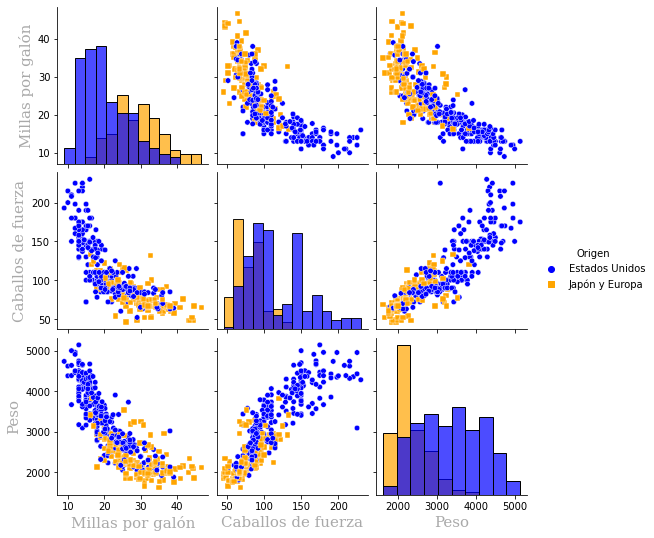

In [41]:
cars = sns.load_dataset("mpg")
cars.loc[cars["origin"]=="usa","Origen"] = "Estados Unidos"
cars.loc[cars["origin"]!="usa","Origen"] = "Japón y Europa"

fig = sns.pairplot(cars, vars=["mpg","horsepower","weight"],hue="Origen",kind="scatter",
                   diag_kind="hist",palette=["blue","orange"],
                   markers=["o", "s"],plot_kws={"s":30},diag_kws={"alpha":0.7})
axes = fig.axes.flatten()
titulos = ["Millas por galón","Caballos de fuerza","Peso"]
c = np.sqrt(len(axes))
for ax1 in np.arange(0,c):
    for ax2 in np.arange(0,c):
        ax = int(ax1*c + ax2)
        if ax2 == 0: axes[ax].set_ylabel(titulos[int(ax1)],fontdict={"family":"serif","color":"darkgrey","size":15})
        if ax1 == c-1: axes[ax].set_xlabel(titulos[int(ax2)],fontdict={"family":"serif","color":"darkgrey","size":15})
plt.show(fig)

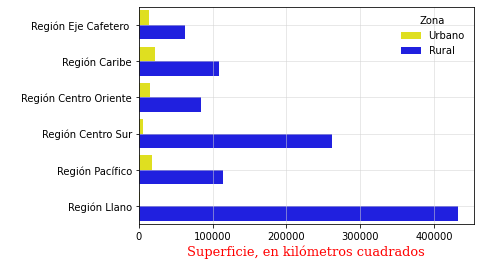

In [42]:
fig=sns.barplot(y="Region",x="Superficie",hue="Zona",data=Municipios,estimator=sum,ci=None,
                palette=dict(Rural="blue",Urbano="yellow"))
plt.xlabel("Superficie, en kilómetros cuadrados",fontdict={"family":"serif","color":"red","size":13})
plt.ylabel(" ")
plt.legend(loc='upper right',title="Zona",frameon=False,ncol=1)
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)

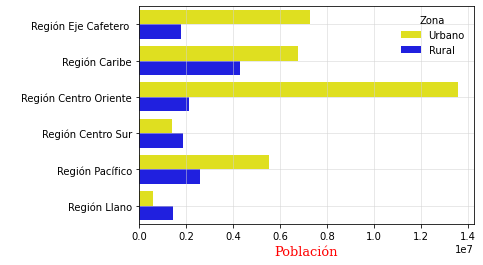

In [43]:
ig=sns.barplot(y="Region",x="Poblacion",hue="Zona",data=Municipios,estimator=sum,ci=None,
                palette=dict(Rural="blue",Urbano="yellow"))
plt.xlabel("Población",fontdict={"family":"serif","color":"red","size":13})
plt.ylabel(" ")
plt.legend(loc='upper right',title="Zona",frameon=False,ncol=1)
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)